In [3]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
from skimage.transform import rescale

from sladsnet.input_params import ERDInputParams, GeneralInputParams, SampleParams
from sladsnet.code.measurement_interface import TransmissionSimulationMeasurementInterface, ExperimentMeasurementInterface
from sladsnet.code.erd import SladsSklearnModel
from sladsnet.code.results import Result
from sladsnet.code.base import ExperimentalSample, Sample
from sladsnet.code.sampling import run_sampling
from sladsnet.code.utils import renormalize

In [2]:
from skimage.metrics import structural_similarity, mean_squared_error

In [4]:
cm = mpl.cm.viridis.copy()
#cm.set_bad('black')
cnorm = mpl.colors.LogNorm

In [5]:
initial_scan_points_num = 500
sample_params = SampleParams(image_shape=(100, 600),
                             inner_batch_size=50,
                             initial_scan_points_num=initial_scan_points_num,
                             initial_scan_ratio=None,
                             stop_ratio=0.3,
                             random_seed=11)


In [6]:
initial_idxs = sample_params.initial_idxs

In [7]:
initial_idxs.shape

(500, 2)

In [8]:
np.savetxt('initial_points_100x600.csv', sample_params.initial_idxs, delimiter=',', fmt='%10d')

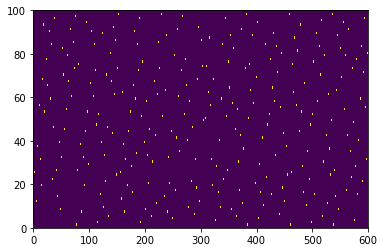

In [9]:
plt.pcolormesh(sample_params.initial_mask)